In [3]:
# Hello Word 7up
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

a_Si = [1.876, 2.617, 0.8604, 0.3903, 0.07769 ]
b_Si = [62.11, 18.68, 3.935, 0.7690, 0.0823]
a_err_Si = 0.5067 * 10**(-3)
B_Si = [b/(4*(np.pi)**(2)) for b in b_Si]

alfa = [0.1, 0.55, 0.35]
beta = [6.0, 1.2, 0.3]

u_1 = 0.075 #preso da sytov thesis
z = 1
a_0 = 0.53 #Angstrom
e = 1.6E-19
N = 4.995E-2 #atomic concentration
Z = 14
d_pl = 1.36 #(100)
d_at = 5.43 #<100>
a_TF = (9*np.pi**2/(128*Z))**(1/3)*a_0

#planar potential 
def U_h_100(x):
    U_0 = 11.9E-19
    return (4*U_0*x**2/d_pl**2)/(10**-19)

def U_M(x): #ze**2 nel caso di un elettrone
    U = 2*np.pi*N*d_pl*Z*z*e*a_TF
    k1 = [alfa[i]/(2*beta[i])*np.exp((beta[i]**2*u_1**2)/(2*a_TF**2))*((np.exp(-x*beta[i]/a_TF)*special.erfc(1/np.sqrt(2)*(u_1*beta[i]/a_TF-x/u_1))+(np.exp(x*beta[i]/a_TF)*special.erfc(1/np.sqrt(2)*(u_1*beta[i]/a_TF+x/u_1))))) for i in range(0,len(alfa))]
    k = sum(k1)
    return U*k

def U_pl_DT(x): #ma in realtà è U
    U = 2*np.sqrt(np.pi)*N*d_pl*Z*z*e*a_0
    k1 = [(a_Si[i]/np.sqrt(B_Si[i]+2*u_1**2))*np.exp(-x**2/(B_Si[i]+2*u_1**2)) for i in range(0,len(a_Si))]
    k = sum(k1)
    return U*k



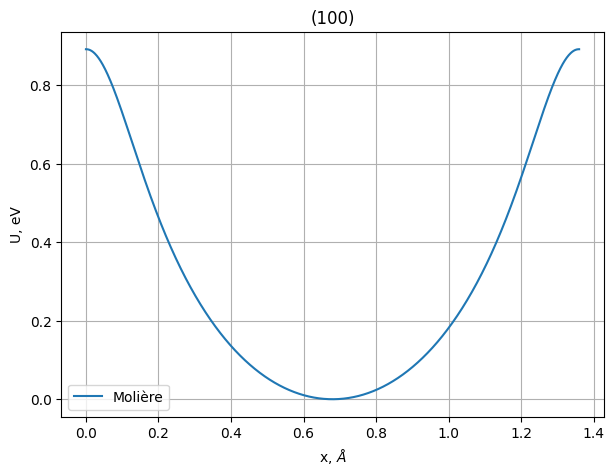

In [4]:
x_DT = np.linspace(0, d_pl ,1000)
nel = 2
plt.rcParams.update(plt.rcParamsDefault)
U_harm = U_h_100(x_DT-d_pl/2)
#Moliere
U_Mol = [U_M(x_DT+n*d_pl) for n in range(-nel,nel)]
U_sum_Mol = sum(U_Mol)/e
U_sum_Mol = U_sum_Mol - min(U_sum_Mol)
#calculate for a number of planes
U_DT = [U_pl_DT(x_DT+n*d_pl) for n in range(-nel,nel)]
U_sum_DT = sum(U_DT)/e
#subtraction of the minimum energy
U_sum_DT = U_sum_DT - min(U_sum_DT)

figure, ax = plt.subplots(figsize=(7,5))

ax.plot(x_DT, U_sum_Mol, label="Molière")
ax.set_title("(100)")
ax.set_ylabel("U, eV")
ax.set_xlabel("x, $\AA$")
ax.legend()
ax.grid()
plt.show()

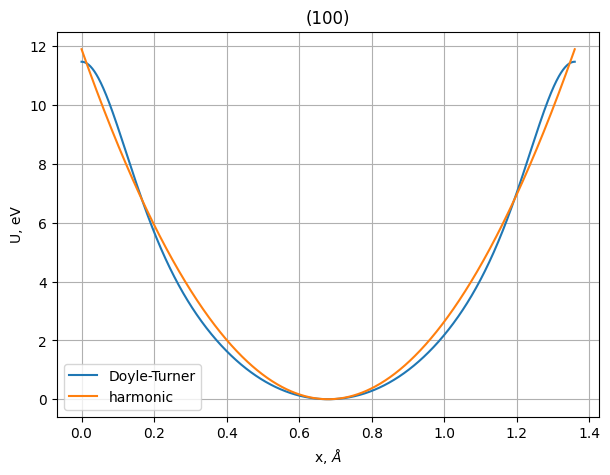

In [5]:
figure, ax = plt.subplots(figsize=(7,5))

ax.plot(x_DT, U_sum_DT, label="Doyle-Turner")
ax.plot(x_DT, U_harm, label="harmonic")
ax.set_title("(100)")
ax.set_ylabel("U, eV")
ax.set_xlabel("x, $\AA$")
ax.legend()
ax.grid()
plt.show()

## 2D Plot of the potentials

(100, 100)


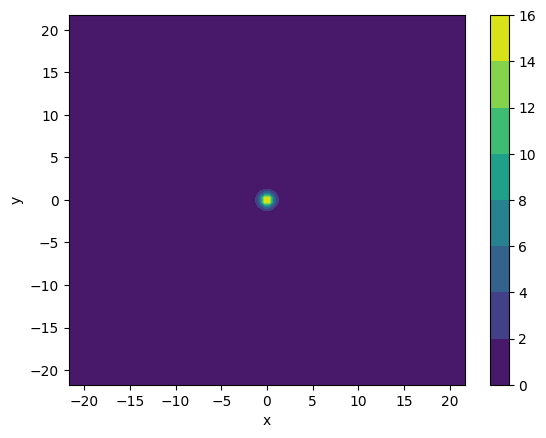

In [6]:
# Definisci la funzione del potenziale 
def U_DT_2D(x, y): 
    U = 2/d_at*Z*z*e*a_0
    k1 = [(a_Si[i]/np.sqrt(B_Si[i]+2*u_1**2))*np.exp(-(x**2+y**2)/(B_Si[i]+2*u_1**2)) for i in range(0,len(a_Si))]
    k = sum(k1)
    return U*k
nat =4
# Definisci il range di x e y
x = np.linspace(-nat*d_at, nat*d_at, 100)
y = np.linspace(-nat*d_at, nat*d_at, 100)

# Crea una griglia di coordinate x e y
X, Y = np.meshgrid(x, y)

# Calcola il valore del potenziale in ogni punto della griglia
U_2D = U_DT_2D(X, Y)/e
print(U_2D.shape)
#Z = [U_DT_2D(X+j*d_at, Y+j*d_at) for j in range (-nat,nat)]

#U_2D = [U_DT_2D(x+j*d_at, y+j*d_at) for j in range (-nat,nat)]
#U_2D_sum = sum(U_2D)/e
#U_2D_sum = U_2D_sum - min(U_2D_sum)
# [-0,8,0,8]
n=20
levels = [ i*(U_2D.max()-U_2D.min())/n for i in range (-n,n)]
#print (levels)
# Crea il grafico
# plt.imshow(Z, extent=[x.min(), x.max(), y.min(), y.max()], cmap='inferno')
plt.contourf(x,y,U_2D)

plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [48]:
# Definisci la funzione del potenziale 

def U_DT_2D(x, y): 
    U1 = 2/d_at*Z*z*e*a_0
    k1 = [(a_Si[i]/np.sqrt(B_Si[i]+2*u_1**2))*np.exp(-(x**2+y**2)/(B_Si[i]+2*u_1**2)) for i in range(0,len(a_Si))]
    k = sum(k1)
    return U1*k

nat = 4
# Definisci il range di x e y
x = np.linspace(-nat*d_at, nat*d_at, 100)
y = np.linspace(-nat*d_at, nat*d_at, 100)
xx, yy = np.meshgrid(x, y)
print(xx)

U_2D = [U_DT_2D(xx+j*d_at, yy+j*d_at) for j in range (-nat, nat)]
#print(U_2D.shape)
print(U_2D)
U_2D_sum = sum(U_2D)/e
U_2D_sum = U_2D_sum - min(U_2D_sum)

n = 20
levels = [i*(U_2D_sum.max()-U_2D_sum.min())/n for i in range (-n, n)]

# Crea il grafico
plt.contourf(x, y, U_2D_sum, levels=levels, cmap='inferno')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

[[-21.72       -21.28121212 -20.84242424 ...  20.84242424  21.28121212
   21.72      ]
 [-21.72       -21.28121212 -20.84242424 ...  20.84242424  21.28121212
   21.72      ]
 [-21.72       -21.28121212 -20.84242424 ...  20.84242424  21.28121212
   21.72      ]
 ...
 [-21.72       -21.28121212 -20.84242424 ...  20.84242424  21.28121212
   21.72      ]
 [-21.72       -21.28121212 -20.84242424 ...  20.84242424  21.28121212
   21.72      ]
 [-21.72       -21.28121212 -20.84242424 ...  20.84242424  21.28121212
   21.72      ]]
[array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.14929400e-19, 5.80519390e-19, 7.37

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()